<center><h1 style="background-color: #C6F3CD; border-radius: 10px; color: #FFFFFF; padding: 5px;">
KNN
</h1><center/>

**Link to the article** :  https://medium.com/@soulawalid/everything-you-need-to-know-about-k-nearest-neighbors-knn-69191186452d?sk=ddd835902b2b77db0a00063a3d49a9b3

In [13]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### Load the data

In [14]:
digits = load_digits()

### X , y and Split

In [16]:
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### The Right K

#### Small K values k=1

In [17]:
knn_small_k = KNeighborsClassifier(n_neighbors=1)
knn_small_k.fit(X_train, y_train)

# Prediction and accuracy
y_pred_small_k = knn_small_k.predict(X_test)
accuracy_small_k = accuracy_score(y_test, y_pred_small_k)
print(f'Accuracy with k=1: {accuracy_small_k}')

Accuracy with k=1: 0.9833333333333333


#### Larger K values  k=5

In [20]:
knn_large_k = KNeighborsClassifier(n_neighbors=20)
knn_large_k.fit(X_train, y_train)

# Prediction and accuracy
y_pred_large_k = knn_large_k.predict(X_test)
accuracy_large_k = accuracy_score(y_test, y_pred_large_k)
print(f'Accuracy with k=5: {accuracy_large_k}')

Accuracy with k=5: 0.975925925925926


#### Cross Validation

In [21]:
k_values = range(1, 31)
cv_scores = []

for k in k_values:
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_cv, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

optimal_k_cv = k_values[cv_scores.index(max(cv_scores))]
print(f'Optimal k with cross-validation: {optimal_k_cv}')

Optimal k with cross-validation: 3


#### Elbow Method

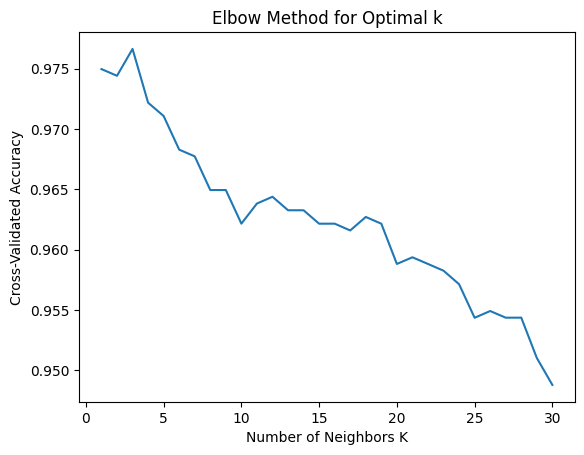

The optimal number of neighbors is 3


In [22]:
plt.plot(k_values, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Elbow Method for Optimal k')
plt.show()

# Print the optimal k
print(f'The optimal number of neighbors is {optimal_k_cv}')

#### Grid Search

In [25]:
# Define the parameter grid to search over
param_grid = {
    'n_neighbors': range(1, 31),
    'metric': ['euclidean', 'manhattan']
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(
    KNeighborsClassifier(),   # Model to tune
    param_grid,               # Hyperparameter grid
    cv=10,                    # Number of cross-validation folds
    scoring='accuracy'        # Performance metric
)

# Perform grid search
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_k = best_params['n_neighbors']
best_metric = best_params['metric']

print(f'Optimal k: {best_k}')
print(f'Optimal distance metric: {best_metric}')

Optimal k: 3
Optimal distance metric: euclidean


---

<center><h1 style="background-color: #C6F3CD; border-radius: 10px; color: #FFFFFF; padding: 5px;">
Classification
</h1><center/>

In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the Iris dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid, including different distance metrics
param_grid = {
    'n_neighbors': range(1, 31),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Predict on the test set using the best model
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Evaluate the performance
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Best parameters: {'metric': 'euclidean', 'n_neighbors': 1}
Accuracy: 0.9833333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.96      1.00      0.98        50
           2       1.00      1.00      1.00        47
           3       0.96      0.98      0.97        54
           4       0.98      0.98      0.98        60
           5       1.00      0.98      0.99        66
           6       1.00      1.00      1.00        53
           7       1.00      0.98      0.99        55
           8       0.98      0.95      0.96        43
           9       0.95      0.95      0.95        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



<center><h1 style="background-color: #C6F3CD; border-radius: 10px; color: #FFFFFF; padding: 5px;">
Regression
</h1><center/>

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Load the data and define X and y
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split the dataset into training and testing sets, then scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid, including different distance metrics
param_grid = {
    'n_neighbors': range(1, 31),
    'metric': ['euclidean', 'manhattan', 'minkowski'] # I will use 3 distance
}

# Perform grid search with cross-validation (10)
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the Best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Predict on the test set using the best model
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Evaluate the performance with R² and MSE 
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')

Best parameters: {'metric': 'manhattan', 'n_neighbors': 10}
Mean Squared Error: 0.3674812694692918
R^2 Score: 0.7200228265166234
